# Exploratory Data Analysis in Python

How do we get from data to answers? Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. This course presents the tools you need to clean and validate data, to visualize distributions and relationships between variables, and to use regression models to predict and explain. You'll explore data related to demographics and health, including the National Survey of Family Growth and the General Social Survey. But the methods you learn apply to all areas of science, engineering, and business. You'll use Pandas, a powerful library for working with data, and other core Python libraries including NumPy and SciPy, StatsModels for regression, and Matplotlib for visualization. With these tools and skills, you will be prepared to work with real data, make discoveries, and present compelling results.

## Read, clean, and validate

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.

### Exploring the NSFG data
To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called nsfg.

In [5]:
# import data
import pandas as pd

nsfg = pd.read_hdf('nsfg.hdf5')

# Display the number of rows and columns
nsfg.shape

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [6]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [8]:
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


### Clean a variable
In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. 

### Clean a variable
In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. 

In [11]:

import numpy as np

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### Compute a variable
For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

In [12]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


### Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill.

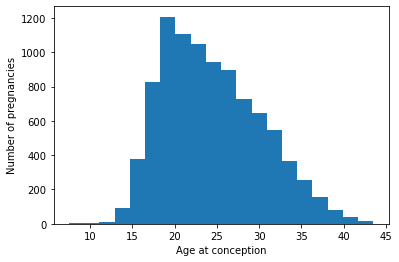

In [13]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(agecon, bins = 20)
# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

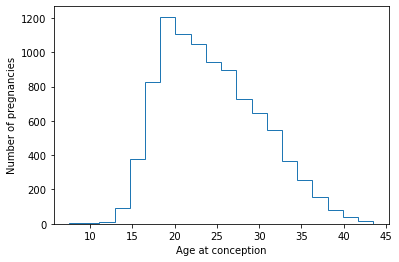

In [14]:
# Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.

# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()